In [ ]:
#for the rest of the project, we use tensorflow because it is easier

import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import pandas as pd

device = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(device[0], True)
(test, train), ds_info =  tfds.load('imdb_reviews', split=['test', 'train'] , shuffle_files=True, as_supervised = True, with_info = True )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete223DGF/imdb_reviews-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete223DGF/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete223DGF/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
#Basic information of the data set we are working with provided by the imports themselves
print(ds_info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='/root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
   

In [ ]:
#Displaying the first instance of the data we're working with

for review,label in train:
  print(review + '\n')
  print(label)
  break

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.\n", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


In [ ]:

#Preprocessing formatting definition of the train and test text/label from the IMBD dataset
def transform(set):
  train_text = []
  train_label = []

  for text,label in train:
    string = str((text.numpy().decode()))
    string = string.replace("<br /><br />", " ")
    string = string.replace("\'", "'")
    train_text.append(string)
    train_label.append(label.numpy())
  return train_text, train_label

#Applying said transform to the dataset
train_text, train_label = transform(train)
test_text, test_label = transform(test)

  

In [ ]:
#First 10 instances of the train set and their corresponding labels after transformation
#Each train_text element is now a string corresponding to the review. Each train_label element is a number (0 or 1) corresponding to a positive/negative review of the movie.

print(train_text[:10])
print(train_label[:10])

["This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", 'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was

In [ ]:
#Importing natural language processing default stop words and making a list of words with it.

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#Updating the nltk default stopwords with those that are pertaining to the movie industry for sentiment analysis.
#For example, movie and film are descriptors that don't pertain much to sentiment.
stop_words = set(stopwords.words('english'))
stop_words.update(['movie', 'film', 'one', 'make', 'even', 'would', 'could', 'really', 'see', 'get', 'much', 'bad', 'good', 'great', 'well', 'also', 'many', 'like', 'first', 'two', 'time', 'character', 'story', 'plot', 'scene', 'actor', 'actress', 'director', 'music', 'sound', 'effect'])

print(stop_words)

{'t', 'myself', 'them', 'before', 'doesn', 'scene', "needn't", 'for', 'all', "hasn't", 'my', 'under', 'like', 'really', 'few', 'aren', "that'll", "shan't", 'm', 'having', 'do', 'now', 'couldn', 'in', 'by', 'i', 'until', 'his', 'ourselves', 'make', 'below', "weren't", 'these', 'o', "haven't", 'shan', 'again', "isn't", 'could', 'were', 'after', 'too', 'our', 'does', 'this', 'yourself', "don't", 'director', 'what', 'doing', 'has', 'its', 're', 'effect', 'y', 'also', "she's", 'will', 'only', 'while', 'than', 'shouldn', 'character', "didn't", 'and', 'much', 'where', 'here', 'him', 'isn', 'any', 'those', 'once', 'whom', 'a', 'during', 'good', 'or', 'it', 'theirs', 'at', 'each', 'been', 'if', 'she', 'is', 'between', 'mustn', 'with', 'your', 'won', "won't", 'wouldn', "wouldn't", 'll', 'there', 'from', 'most', 'on', "couldn't", 'own', 'yourselves', 'out', "doesn't", 'her', 'itself', "shouldn't", 'am', 'some', 'they', 'why', 'see', "you're", 'hers', 'not', 'you', 'their', 've', 'into', 'ain', 'y

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#add lemmatization
#similar words are combined
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('punkt')
nltk.download('wordnet')
import nltk.stem
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]


stop = ["a", "00", ",", ")", "(", "'", ",", ".", "''","'s", "'ve", "'m" , "'d", "-", "``"]
vectorizer = CountVectorizer(stop_words = stop, ngram_range=(1,2), tokenizer=LemmaTokenizer(), min_df=100, max_features = 8500 )
train_x = (vectorizer.fit_transform(train_text)).toarray()
test_x = (vectorizer.transform(test_text)).toarray()
print(test_x.shape)
names = vectorizer.get_feature_names_out()


for name in names[:500]:
  print(name)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(25000, 8500)
!
! !
! ?
! and
! but
! for
! he
! i
! if
! in
! it
! so
! that
! the
! there
! they
! this
! what
! you
#
$
%
% of
&
& the
'll
'll be
'll have
'll never
'll see
're
're going
're in
're looking
're not
'the
*
* *
* 1/2
* out
* spoiler
* the
--
-- and
-- but
-- i
-- it
-- the
..
.. i
...
... and
... but
... i
... it
... or
... the
... this
... well
... what
... you
....
.....
......
/
1
1.
1/10
1/2
10
10 minute
10 out
10 year
10.
10/10
100
11
12
13
14
15
15 minute
17
18
1930s
1950
1950s
1970
1970s
1980
1980s
1990
1st
2
2 hour
2.
2/10
20
20 minute
20 year
2000
2001
2005
2006
20th
24
25
3
3.
3/10
30
30 minute
4
4/10
40
5
5 minute
50
6
60
7
7/10
70
8
8/10
80
9
9/10
90
90 minute
:
: he
: i
: if
: it
: the
: this
: you
;
; and
; but
; he
; i
; it
; the
; they
; this
?
? !
? ?
? and
? because
? but
? he
? how
? i
? if
? in
? is
? it
? no
? not
? or
? that
? the
? there
? they
? this
? well
? what
? who
? why
? you
`
abandoned
ability
ability to
able
able to
about
about an
about

In [ ]:
#we can add more preproproccessing but start with bayses

# i don't know if the parameters i added help, but we can modify when we train
# for bayses i think we need around 85+ accuracy


In [ ]:
#Class Definition of GaussianNaiveBayes
#Use this link as citation when doing the report
#https://github.com/rabbanyk/comp551-notebooks/blob/master/NaiveBayes.ipynb?fbclid=IwAR0Wqjroy0SttCjWhpWM70Xdae44loC5MXvHySFQ9iw7W37b8OTSAQLHcIs


#Imports necessary for Naive Bayes
import numpy as np
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
np.random.seed(1234) 


class GaussianNaiveBayes:
    def __init__(self):
        return
    def fit(self, x, y, myalpha):
        N, D = x.shape
        C = np.max(y) + 1
        # one parameter for each feature conditioned on each class
        mu, sigma = np.zeros((C,D)), np.zeros((C,D))
        Nc = np.zeros(C) # number of instances in class c
        # for each class get the MLE for the mean and std
        for c in range(C):
            x_c = x[np.where(y==c)]                   #slice all the elements from class c
            Nc[c] = x_c.shape[0]                      #get number of elements of class c
            mu[c,:] = np.mean(x_c,0)                  #mean of features of class c
            sigma[c,:] = np.std(x_c, 0)               #std of features of class c
        self.mu = mu                                  # C x D
        self.sigma = sigma                            # C x D
        self.pi = (Nc+myalpha)/(N+(myalpha*C))                      #Laplace smoothing (using alpha_c=1 for all c) you can derive using Dirichlet's distribution
        self.y_pred = []
        self.probabilities = []
        return self
    def predict(self, xt):
        Nt, D = xt.shape
        # for numerical stability we work in the log domain
        # we add a dimension because this is added to the log-likelihood matrix 
        # that assigns a likelihood for each class (C) to each test point, and so it is C x N
        log_prior = np.log(self.pi)[:, None]
        # logarithm of the likelihood term for Gaussian 
        # the first two terms are the logarithm of the normalization term in the Gaussian and the final term is the exponent in the Gaussian. 
        # Notice that we are adding dimensions (using None) to model parameters and data to make this evaluation. 
        # The reason is that sigma and mu are C x D, while the data x is N x D. We operate on a C x N x D shape by increasing the number of dimensions when needed
        
        log_likelihood = -.5 * np.log(2*np.pi) - np.log(self.sigma[:,None,:]) -.5 * (((xt[None,:,:] - self.mu[:,None,:])/self.sigma[:,None,:])**2)
        self.probabilities = log_likelihood
        # now we sum over the feature dimension to get a C x N matrix (this has the log-likelihood for each class-test point combination)
        log_likelihood = np.sum(log_likelihood, axis=2)
        # posterior calculation
        log_posterior = log_prior + log_likelihood
        posterior = np.exp(log_posterior - logsumexp(log_posterior))
        self.y_pred = np.argmax(posterior.T,1)
        return posterior.T
    def test_accuracy(self, y_test):   
        y_pred = self.y_pred
        return np.sum(y_pred == y_test)/y_pred.shape[0];
            
def logsumexp(Z):                                                # dimension C x N
        Zmax = np.max(Z,axis=0)[None,:]                              # max over C
        log_sum_exp = Zmax + np.log(np.sum(np.exp(Z - Zmax), axis=0))
        return log_sum_exp







In [ ]:
from sklearn import model_selection

model = GaussianNaiveBayes()
model.fit(np.asarray(train_x), np.asarray(train_label), 1)

y_prob = model.predict(test_x)
print(test_label)
accuracy = model.test_accuracy(test_label)
print(accuracy)
print(model.probabilities)

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 

Parameter tunning

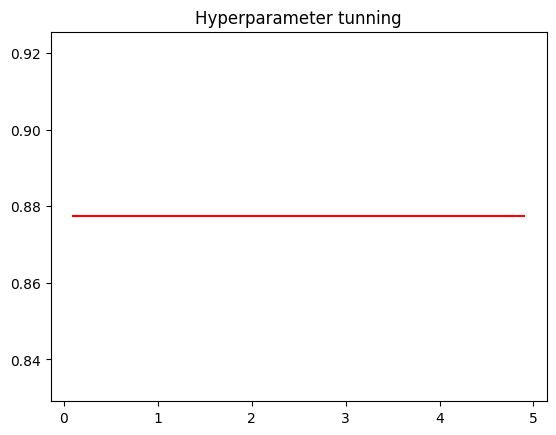

In [ ]:
import matplotlib.pyplot as plt
accuracies = []
alpha = np.arange(0.1, 5, 0.1)
for myalpha in alpha:
  model.fit(np.asarray(train_x), np.asarray(train_label), 1)
  y_prob1 = model.predict(test_x)
  #print(test_label)
  accuracy = model.test_accuracy(test_label)
  accuracies = np.append(accuracies, accuracy)

plt.title("Hyperparameter tunning")
plt.plot(alpha, accuracies, color="red")

plt.show()

The value of alpha does not impact the accuracy

25000 8500
hi (2, 8500)
[[6.20288222e+03 3.08822098e+03 3.08621723e+03 ... 4.84590146e-12
  1.80477855e-12 9.94759830e-14]
 [2.47083950e+00 2.25271544e+00 2.22428136e+00 ... 3.08642001e-14
  9.32587341e-15 4.44089210e-16]]
['2/10', '4/10', 'this crap', 'mst3k', 'worst film', 'this mess', 'worst movie', '7/10', '8/10', 'waste your', '1/10', '3/10', 'save this', 'well worth', 'highly recommended', 'waste of', 'is awful', 'avoid this', 'definitely worth', 'stinker']
['2/10', '4/10', 'this crap', 'this mess', 'mst3k', 'save this', 'worst film', '7/10', '1/10', '3/10', 'definitely worth', 'stinker', 'skip this', '8/10', 'save your', 'highly recommended', 'flawless', 'awful and', 'wa awful', 'well worth']


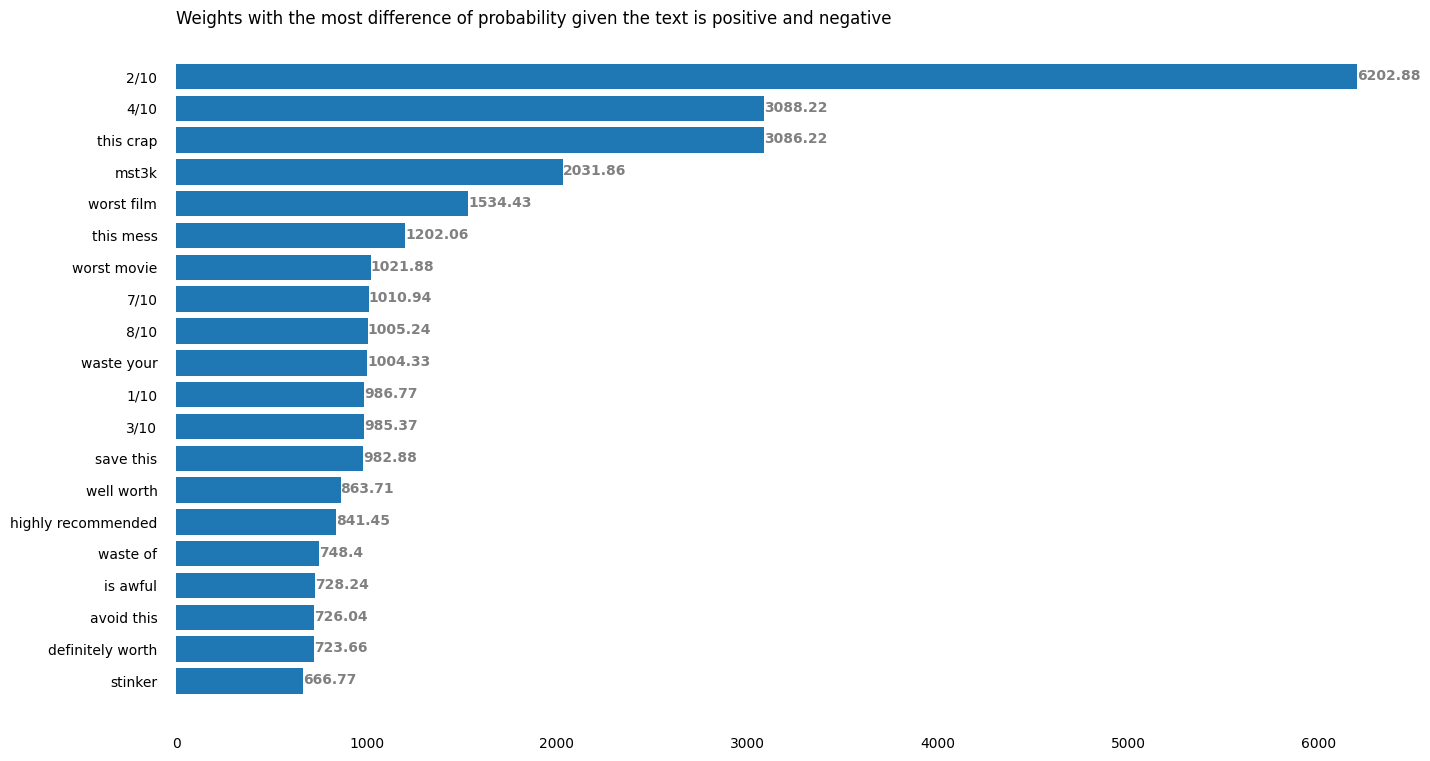

In [ ]:
size = 8500
#no features
s1 = np.ones(size)
#one feature
s2 = np.zeros(size)
print(test_x.shape[0], test_x.shape[1] )

testdata = np.stack((s1,s2))

y_prob2 = model.predict(testdata)

prob = model.probabilities

diff = np.abs(np.subtract(prob[0,:,:], prob[1,:,:]))
print("hi", diff.shape)

print(np.fliplr((np.sort(diff, axis=1))))
n1 = diff[1].argsort()[-20:][::-1]
n2 = diff[0].argsort()[-20:][::-1]

w1 = []
log = []
w2 = []
diff1 = diff[0]
for n in range(20):

  i1 = n1[n]
  i2 = n2[n]
  log.append(diff1[i2])
  w1.append(names[i1])
  w2.append(names[i2])

#when 
print(w1)
print(w2)
index = (np.argmax(diff))
index = (np.floor_divide(index, 8127),index%8127) 

import pandas as pd
from matplotlib import pyplot as plt
 
# Read CSV into pandas
name = w1
price = log
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 

# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Weights with the most difference of probability given the text is positive and negative',
             loc ='left', )
 

# Show Plot
plt.show()

We see that if the word is present, it impacts the result more than if it is not.
We display the weights having the most impact on the result


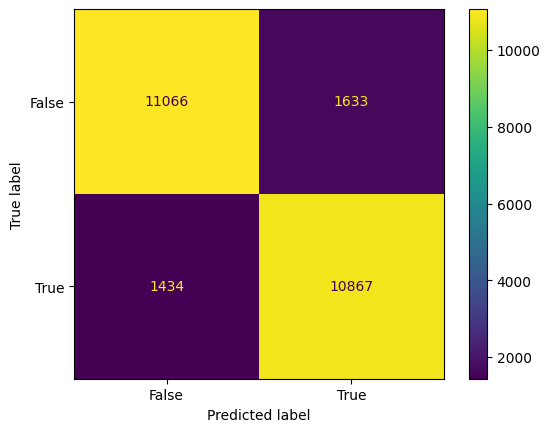

In [ ]:
from sklearn import metrics

y_pred = np.argmax(y_prob,1)
confusion_matrix = metrics.confusion_matrix(y_pred, test_label)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

confusion matrix

TRUE NEGATIVE:11066

TRUE POSITIVE: 10867

FALSE NEGATIVE:1633

FALSE POSITIVE:1434

In [ ]:
tn = 11066
tp = 10867
fn = 1633
fp = 1434

accuracy  =(tp+tn)/(tn+fn+fp+tp)
precision = tp/(tp+fp)
recall = tp/(fn+tp)
f1 = 2*precision*recall/(precision+recall)

print("accuracy: ", accuracy )
print("precision: ", precision )
print("recall: ", recall)
print("f1: ", f1 )

accuracy:  0.87732
precision:  0.8834241118608244
recall:  0.86936
f1:  0.876335631627757
